<a href="https://colab.research.google.com/github/edojatheophilus/Trainings/blob/main/AML_3104_Neural_Networks_and_Deep_Learning_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df =pd.read_excel('/content/ht_wt.xlsx')

In [5]:
print(df)

        Weight      Height
0    88.732499  186.660915
1    89.572826  178.187096
2    81.322595  171.218422
3    70.491624  152.215848
4    91.202060  190.836618
..         ...         ...
295  66.702048  158.928263
296  63.753183  171.435062
297  66.341988  156.143940
298  73.068323  169.682917
299  82.091446  159.479272

[300 rows x 2 columns]


In [6]:
# Check for missing values
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  300 non-null    float64
 1   Height  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


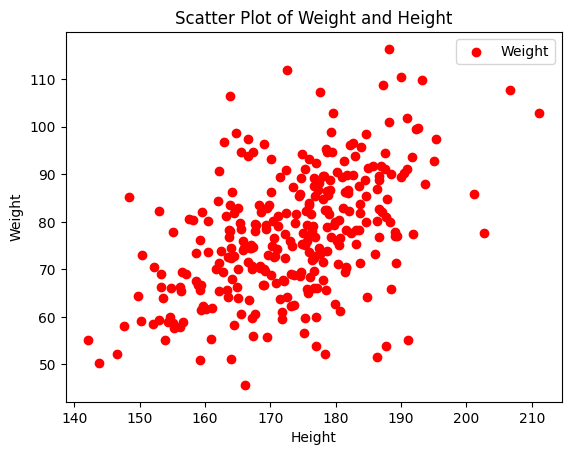

In [61]:
plt.scatter(x="Height", y="Weight", data=df, color="red")
# Adding labels and title
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Weight and Height')
plt.legend()
plt.show()

In [13]:
#describe analysis
df.describe()

,Weight,Height
count,300.000000,300.000000
mean,77.448265,173.266993
std,12.990495,11.400757
min,45.703660,142.164737
25%,68.496932,165.254379
50%,77.245367,174.521556
75%,86.272251,180.769794
max,116.375570,211.138124


In [15]:
# Calculate the Interquartile Range (IQR) for the 'Weight' column
IQR_weight = df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)

# Print the result
print("Interquartile Range (IQR) for Weight:", IQR_weight)


Interquartile Range (IQR) for Weight: 17.775318859603075


In [18]:
'''upper_limit_wt=df.weight.quantile(0.75)+1.5*IQR_wit
lower_limit_wt=df.weight.quantile(0.25)+1.5*IQR_wit
'''
# Calculate the Interquartile Range (IQR) for the 'Weight' column
IQR_weight = df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)

# Calculate the upper limit for potential outliers
upper_limit_wt = df['Weight'].quantile(0.75) + 1.5 * IQR_weight

# Calculate the lower limit for potential outliers
lower_limit_wt = df['Weight'].quantile(0.25) - 1.5 * IQR_weight

# Print the result
print("Upper Limit for Weight (Outlier Detection):", upper_limit_wt)

# Print the result
print("Lower Limit for Weight (Outlier Detection):", lower_limit_wt)

Upper Limit for Weight (Outlier Detection): 112.93522907977672
Lower Limit for Weight (Outlier Detection): 41.833953641364424


In [19]:
df


,Weight,Height
0,88.732499,186.660915
1,89.572826,178.187096
2,81.322595,171.218422
3,70.491624,152.215848
4,91.202060,190.836618
...,...,...
295,66.702048,158.928263
296,63.753183,171.435062
297,66.341988,156.143940
298,73.068323,169.682917


In [42]:
#spliting the data into input and output

X = df[['Weight']]   # input variable
Y = df['Height']   # output variable

In [43]:
X.shape,Y.shape

((300, 1), (300,))

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - X:", X_train.shape, " y:", y_train.shape)
print("Testing set - X:", X_test.shape, " y:", y_test.shape)

Training set - X: (240, 1)  y: (240,)
Testing set - X: (60, 1)  y: (60,)


In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 1), (60, 1), (240,), (60,))

In [46]:
lr=LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [51]:
#lr.coef_ gives you the slope (m), and lr.intercept_ gives you the intercept (c)
lr.coef_, lr.intercept_

(array([0.42047803]), 141.32893968111378)

In [56]:
# Evaluate the model (you can use different metrics depending on your task)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 67.36947599376231
Mean Absolute Error: 6.753916946268354
R-squared: 0.3212075403529888
